# **Handling Missing Data Numerical by Mean, Median, Simple Imputer**

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [28]:
df = pd.read_csv('./dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [30]:
X = df.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
y = df['Survived']

In [31]:
X

,Age,SibSp,Fare
0,22.0,1,7.2500
1,38.0,1,71.2833
2,26.0,0,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500
...,...,...,...
886,27.0,0,13.0000
887,19.0,0,30.0000
888,NaN,1,23.4500
889,26.0,0,30.0000


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [34]:
X_train.isnull().mean()

Age      0.196629
SibSp    0.000000
Fare     0.000000
dtype: float64

In [35]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [36]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [37]:
X_train.sample(5)

,Age,SibSp,Fare,Age_median,Age_mean,Fare_median,Fare_mean
665,32.0,2,73.5000,32.0,32.000000,73.5000,73.5000
851,74.0,0,7.7750,74.0,74.000000,7.7750,7.7750
334,NaN,1,133.6500,28.0,29.498846,133.6500,133.6500
105,28.0,0,7.8958,28.0,28.000000,7.8958,7.8958
713,29.0,0,9.4833,29.0,29.000000,9.4833,9.4833


In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2700.831981118079
Fare Variance after median imputation:  2700.831981118079
Fare Variance after mean imputation:  2700.831981118079


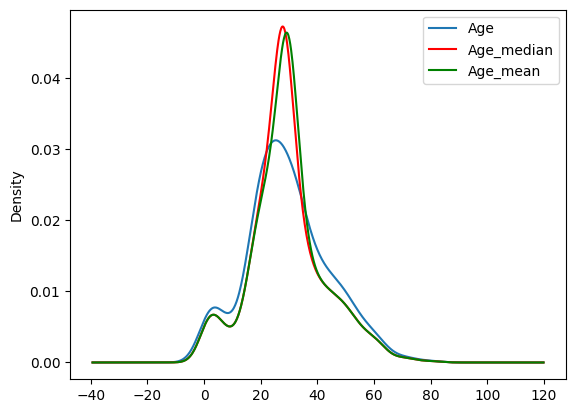

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

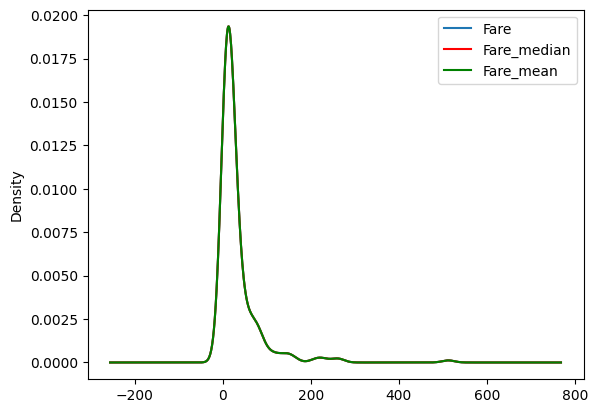

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
X_train.cov()

,Age,SibSp,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,-4.501273,71.580633,210.251707,210.251707,71.580633,71.580633
SibSp,-4.501273,1.383927,9.354652,-3.637141,-3.614946,9.354652,9.354652
Fare,71.580633,9.354652,2700.831981,61.261919,57.485994,2700.831981,2700.831981
Age_median,210.251707,-3.637141,61.261919,169.207310,168.851934,61.261919,61.261919
Age_mean,210.251707,-3.614946,57.485994,168.851934,168.851934,57.485994,57.485994
Fare_median,71.580633,9.354652,2700.831981,61.261919,57.485994,2700.831981,2700.831981
Fare_mean,71.580633,9.354652,2700.831981,61.261919,57.485994,2700.831981,2700.831981


In [42]:
X_train.corr()

,Age,SibSp,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,-0.320916,0.088103,1.000000,1.000000,0.088103,0.088103
SibSp,-0.320916,1.000000,0.153011,-0.237681,-0.236479,0.153011,0.153011
Fare,0.088103,0.153011,1.000000,0.090622,0.085126,1.000000,1.000000
Age_median,1.000000,-0.237681,0.090622,1.000000,0.998949,0.090622,0.090622
Age_mean,1.000000,-0.236479,0.085126,0.998949,1.000000,0.085126,0.085126
Fare_median,0.088103,0.153011,1.000000,0.090622,0.085126,1.000000,1.000000
Fare_mean,0.088103,0.153011,1.000000,0.090622,0.085126,1.000000,1.000000


<Axes: >

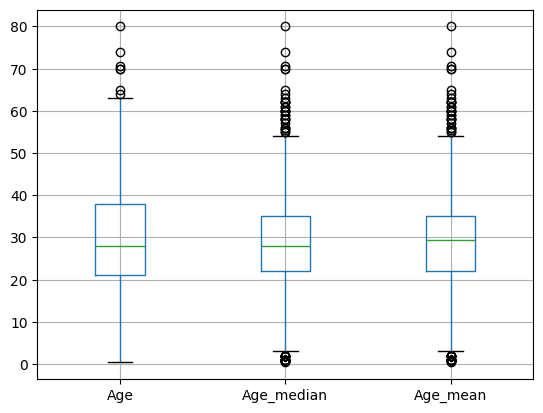

In [43]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

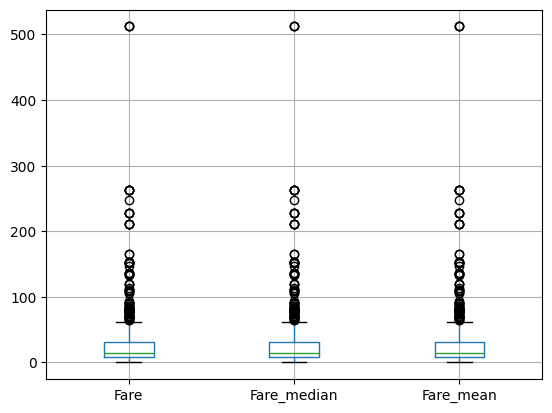

In [44]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

## **Using Sklearn**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [47]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [48]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [49]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [50]:
trf.named_transformers_['imputer2'].statistics_

array([32.58627612])

In [51]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [52]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   2.    ],
       [ 14.    , 120.    ,   1.    ],
       [ 21.    ,  77.2875,   0.    ]])